In [29]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist #ucitaj podatke

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
#podela podataka na testni skup i na trening skup

print("Trening skup: ", train_images.shape)
#Imamo 60 000 slika velicine 28x28 piksela(784 piksela ukupno)

print("Testni skup: ", test_images.shape)
#Imamo 10 000 slika u tetnom skupu velicine 28x28 piksela(784 piksela ukupno)

print("Piksel: ",train_images[0,23,23]) #pogled na 1 piksel
#vrednosti piksela su izmedju 0 i 255, 0(crna boja) i 255(bela boja) 

print("Prvih 10 podataka u trening skupu: ", train_labels[:10])

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']



Trening skup:  (60000, 28, 28)
Testni skup:  (10000, 28, 28)
Piksel:  194
Prvih 10 podataka u trening skupu:  [9 0 0 3 0 2 7 2 5 5]


In [30]:
#prethodna obrada podataka
#vrednosti moraju biti izmedju 0 i 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#arhitektura modela
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('TEST TACNOSTI:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5283 - accuracy: 0.8130
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4001 - accuracy: 0.8559
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3636 - accuracy: 0.8677
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3462 - accuracy: 0.8729
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3285 - accuracy: 0.8786
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3199 - accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3102 - accuracy: 0.8839
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2977 - accuracy: 0.8886
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2895 - accuracy: 0.8927
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss

[3.5694242e-07 3.1164779e-10 3.3774714e-09 1.2582819e-11 6.3138772e-11
 3.2539989e-03 1.3650462e-07 1.2962611e-03 3.3463396e-09 9.9544924e-01]
9
Ankle boot


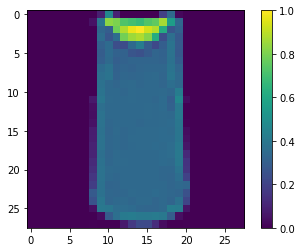

In [32]:

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()



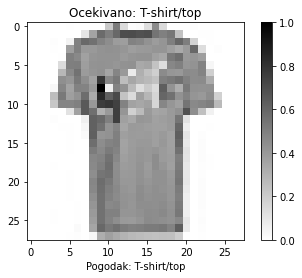

In [38]:

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']

    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Ocekivano: " + label)
    plt.xlabel("Pogodak: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Unesi broj: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Pokusaj ponovo...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

